**Relax take home**

We'll start by importing and exploring the data and then I wil summarize my findings below.

In [214]:
import pandas as pd
import datetime as dt
from sklearn import *
%matplotlib inline

#import data
data_1 = pd.read_csv(r'C:\Users\anhem44\Data\relax_challenge\takehome_user_engagement.csv')
data_2 = pd.read_csv(r'C:\Users\anhem44\Data\relax_challenge\takehome_users.csv',encoding='latin-1')

In [215]:
data_1.head() #check data

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [216]:
data_2.head() #check data

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [217]:
print(len(data_1)) #check data
print(len(data_2))

207917
12000


In [218]:
data_1.visited.max() #check data

1

The question deifnes an adopted user as one who was 3 tiems in a 7 week period.

In [219]:
data_1['time_stamp'] = pd.to_datetime(data_1['time_stamp'])  #create week variable for 7 day window
data_1['week'] = data_1['time_stamp'].dt.weekofyear

adopted = data_1[['user_id','visited','week']].groupby(['user_id','week']).count() #countnumber of times a week a user loged in
adopted = adopted[adopted.visited >= 3].index.get_level_values(0) #if it was greater than 3 times add to list
adopted = adopted.unique() #get unique user id's for adopted users

data_2['adopted'] = 0 #set adopted to 0
data_3 = data_2[~data_2['object_id'].isin(adopted)] #df of users who did not adopt
data_4 = data_2[data_2['object_id'].isin(adopted)] #df of users who did adopt
data_4['adopted'] = 1 #update adopted variable to 1(yes) for adopted users

final_data = pd.concat([data_3,data_4]) #rejoin dfs
len(final_data) #check length to make sure all observations are there

C:\Users\anhem44\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


12000

Now that we have our target we clean the data

In [220]:
for column in final_data: #check data completness
    print(column, final_data[column].isnull().sum())

object_id 0
creation_time 0
name 0
email 0
creation_source 0
last_session_creation_time 3177
opted_in_to_mailing_list 0
enabled_for_marketing_drip 0
org_id 0
invited_by_user_id 5583
adopted 0


In [221]:
final_data.dtypes

object_id                       int64
creation_time                  object
name                           object
email                          object
creation_source                object
last_session_creation_time    float64
opted_in_to_mailing_list        int64
enabled_for_marketing_drip      int64
org_id                          int64
invited_by_user_id            float64
adopted                         int64
dtype: object

In [227]:
final_data['creation_time'] = pd.to_datetime(final_data['creation_time'])  #get useful date variables
final_data['week'] = final_data['creation_time'].dt.weekofyear
final_data['hour'] = final_data['creation_time'].dt.hour
final_data['day'] = final_data['creation_time'].dt.weekday
final_data['dayofyear'] = final_data['creation_time'].dt.dayofyear
final_data['month'] = final_data['creation_time'].dt.month
final_data['year'] = final_data['creation_time'].dt.weekofyear

y = final_data['adopted'] #target
x_1 = final_data.drop(final_data[['name','email','creation_time','adopted','object_id']], axis=1) #drop unique info and date
x_1.fillna(0, inplace=True) #fill NaN
x = pd.get_dummies(x_1)
x

,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,week,hour,day,dayofyear,month,year,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1.398139e+09,1,0,11,10803.0,17,3,1,112,4,17,1,0,0,0,0
2,1.363735e+09,0,0,94,1525.0,12,23,1,78,3,12,0,1,0,0,0
3,1.369210e+09,0,0,1,5151.0,21,8,1,141,5,21,1,0,0,0,0
4,1.358850e+09,0,0,193,5240.0,3,10,3,17,1,3,1,0,0,0,0
5,1.387424e+09,0,0,197,11241.0,51,3,1,351,12,51,1,0,0,0,0
6,1.356010e+09,0,1,37,0.0,50,13,6,351,12,50,0,0,0,1,0
7,0.000000e+00,1,1,74,0.0,31,5,2,212,7,31,0,0,1,0,0
8,0.000000e+00,0,0,302,0.0,45,4,1,309,11,45,0,0,1,0,0
10,1.388117e+09,0,0,69,0.0,52,3,3,360,12,52,0,0,0,1,0
11,0.000000e+00,0,0,130,9270.0,16,23,3,107,4,16,0,1,0,0,0


Now that we have clean data and a target it's time to choose a model. For simplicty sake, lets try several different models including a voting classifer to see which performs best.

In [228]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.33, random_state=42) #split data

LR = linear_model.LogisticRegression(random_state=42) #set models
RF = ensemble.RandomForestClassifier(random_state=42)
KNN = neighbors.KNeighborsClassifier()
VC = ensemble.VotingClassifier(estimators=[('LR', LR), ('RF', RF), ('KNN', KNN)], voting='hard')

LR_model = LR.fit(x_train,y_train) #fit models
RF_model = RF.fit(x_train,y_train)
KNN_model = KNN.fit(x_train,y_train)
VC_model = VC.fit(x_train,y_train)

y_pred_LR = LR_model.predict(x_test) #predict test data
y_pred_RF = RF_model.predict(x_test)
y_pred_KNN = KNN_model.predict(x_test)
y_pred_VC = VC_model.predict(x_test)

score_LR = metrics.accuracy_score(y_test,y_pred_LR) #compute scores
score_RF = metrics.accuracy_score(y_test,y_pred_RF)
score_KNN = metrics.accuracy_score(y_test,y_pred_KNN)
score_VC = metrics.accuracy_score(y_test,y_pred_VC)

print('LR:',score_LR) #print scores
print('RF:',score_RF)
print('KNN:',score_KNN)
print('VC:',score_VC)

LR: 0.883333333333
RF: 0.959343434343
KNN: 0.920202020202
VC: 0.940909090909


The random forest model works the best (95%!) accuracy. We can use feature imoprtances method on a RF object to see what the most important feature is.

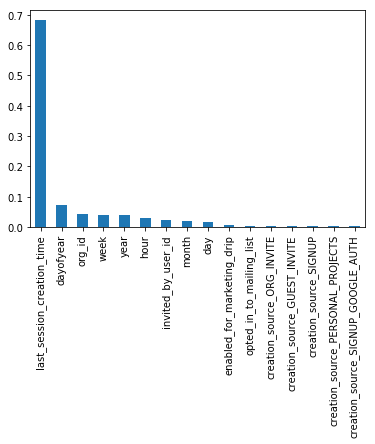

In [229]:
features=pd.Series(RF_model.feature_importances_,index=x.columns)
features.sort_values(ascending=False).plot(kind='Bar')

last_session_creation_time is by far the most importnant. For completness sake lets see how well the model does without this feature and what the next most important features are.

RF: 0.959343434343


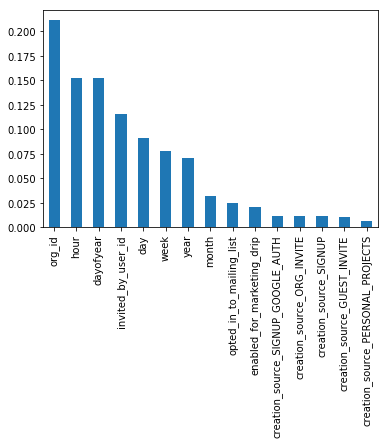

In [230]:
x_2 = x.drop(x[['last_session_creation_time']],axis=1)

x_train, x_test, y_train, y_test = model_selection.train_test_split(x_2, y, test_size=0.33, random_state=42)
RF_2 = ensemble.RandomForestClassifier(random_state=42)
RF_model_2 = RF_2.fit(x_train,y_train)
y_pred_RF_2 = RF_model_2.predict(x_test)
score_RF_2 = metrics.accuracy_score(y_test,y_pred_RF_2)
print('RF:',score_RF)

features=pd.Series(RF_model_2.feature_importances_,index=x_2.columns)
features.sort_values(ascending=False).plot(kind='Bar')

**Summary**

The most important features are last_session_creation_time and org_id. the reasons for last_session_creation_time being such a strong predictor are pretty obvious: people who are active are more likely to be adopted. This provides no sueful information for study. org_id does,however, provide some interesting avenues for future research. The most important feature is what organazation the user belongs to, this leads to the obvious conclusion that the software is for work. Certain organazation's have adopted the software more widely then others. Interesting questions that arise from this are what are the qualities of an organazation (type of work, saturation, etc.) that lead an organazation to adopt this software mroe than others.